**Roman Schiffino**

Spring 2024

CS 251/2: Data Analysis and Visualization

Project 1: Data Analysis and Visualization

**Week 2: Start this after Week 2 lab (Lab 1b)**

## Task 2: Update `Data` class for data selection

You will update `Data` to allow the user to select one or more data variables based on their string name. This will give you some practice working with numpy basics.

Implement the following methods in `Data`:
- `get_all_data()`
- `head()`: Return the 1st five data samples (all variables)
- `tail()`: Return the last five data samples (all variables)
- `limit_samples(self, start_row, end_row)`: Update the data so that the object only stores the samples in the contiguous range `[start_row, end_row)`.
- `select_data(headers, rows=[])`: Return data samples corresponding to the variable names in `headers`. If `rows` is empty, return all samples, otherwise return samples at the indices specified by the `rows` list.

In [1]:
from data import Data
import numpy as np
import matplotlib.pyplot as plt
from analysis import Analysis

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

### 2a. Test `get_all_data`

#### (i) Basic test

In [2]:
iris_filename = 'data/iris.csv'
iris_data = Data(iris_filename)
dat = iris_data.get_all_data()
dat[0,:] = -9999
new_dat = iris_data.get_all_data()
if new_dat[0, 0] == -9999.:
    print('!!You did not return a copy of your data!!\n')
else:
    print('get_all_data seems ok!')

Reading data from file: data/iris.csv
Data extracted from file. 
Now processing data...

Data processing complete!

get_all_data seems ok!


#### (ii) Test with passing ndarray into constructor

In [3]:
test_ii = np.arange(12).reshape([3, 4])
test_ii_data = Data(data=test_ii)
test_ii_data_get = test_ii_data.get_all_data()
print(f'After passing in test data ndarray into your Data object, the data returned is:\n{test_ii_data_get}')
print('It should be:')
print('''[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]''')


After passing in test data ndarray into your Data object, the data returned is:
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
It should be:
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


### 2b. Test `head` and `tail`

#### (i) Iris

In [4]:
iris_filename = 'data/iris.csv'
iris_data = Data(iris_filename)
print(f'Your Iris head (shape={iris_data.head().shape}) is:\n{iris_data.head()}')
print(f'Your Iris tail (shape={iris_data.head().shape}) is:\n{iris_data.tail()}')

Reading data from file: data/iris.csv
Data extracted from file. 
Now processing data...

Data processing complete!

Your Iris head (shape=(5, 5)) is:
[[5.1 3.5 1.4 0.2 0. ]
 [4.9 3.  1.4 0.2 0. ]
 [4.7 3.2 1.3 0.2 0. ]
 [4.6 3.1 1.5 0.2 0. ]
 [5.  3.6 1.4 0.2 0. ]]
Your Iris tail (shape=(5, 5)) is:
[[6.7 3.  5.2 2.3 2. ]
 [6.3 2.5 5.  1.9 2. ]
 [6.5 3.  5.2 2.  2. ]
 [6.2 3.4 5.4 2.3 2. ]
 [5.9 3.  5.1 1.8 2. ]]


You should see:

    Your Iris head (shape=(5, 5)) is:
    [[5.1 3.5 1.4 0.2 0. ]
    [4.9 3.  1.4 0.2 0. ]
    [4.7 3.2 1.3 0.2 0. ]
    [4.6 3.1 1.5 0.2 0. ]
    [5.  3.6 1.4 0.2 0. ]]
    Your Iris tail (shape=(5, 5)) is:
    [[6.7 3.  5.2 2.3 2. ]
    [6.3 2.5 5.  1.9 2. ]
    [6.5 3.  5.2 2.  2. ]
    [6.2 3.4 5.4 2.3 2. ]
    [5.9 3.  5.1 1.8 2. ]]

#### (ii) Data with small number of samples

In [5]:
test_filename = 'data/test_data_spaces.csv'
test_data = Data(test_filename)
print(test_data.dTRef.__members__)
print(f'Your test head (shape={test_data.head().shape}) is:\n{test_data.head()}')
print(f'Your test tail (shape={test_data.head().shape}) is:\n{test_data.tail()}')


Reading data from file: data/test_data_spaces.csv
Invalid data type: string
Ignoring Column.

Invalid data type: string
Ignoring Column.

Data extracted from file. 
Now processing data...

Data processing complete!

{'numeric': <DataTypesTrim.numeric: 'numeric'>, 'categorical': <DataTypesTrim.categorical: 'categorical'>, 'missing': <DataTypesTrim.missing: 'missing'>}
Your test head (shape=(3, 4)) is:
[[ 1.  2.  3.  4.]
 [ 5.  6.  7.  8.]
 [ 9. 10. 11. 12.]]
Your test tail (shape=(3, 4)) is:
[[ 1.  2.  3.  4.]
 [ 5.  6.  7.  8.]
 [ 9. 10. 11. 12.]]


You should see:

    Your test head (shape=(3, 4)) is:
    [[ 1.  2.  3.  4.]
     [ 5.  6.  7.  8.]
     [ 9. 10. 11. 12.]]
    Your test tail (shape=(3, 4)) is:
    [[ 1.  2.  3.  4.]
     [ 5.  6.  7.  8.]
     [ 9. 10. 11. 12.]]

### 2c. Test `limit_samples`

In [6]:
iris_filename = 'data/iris.csv'
iris_data = Data(iris_filename)
iris_data.limit_samples(50, 100)
print(f'After limiting samples, your test head is:\n{iris_data.head()}')
print(f'After limiting samples, your test tail is:\n{iris_data.tail()}')

Reading data from file: data/iris.csv
Data extracted from file. 
Now processing data...

Data processing complete!

After limiting samples, your test head is:
[[7.  3.2 4.7 1.4 1. ]
 [6.4 3.2 4.5 1.5 1. ]
 [6.9 3.1 4.9 1.5 1. ]
 [5.5 2.3 4.  1.3 1. ]
 [6.5 2.8 4.6 1.5 1. ]]
After limiting samples, your test tail is:
[[5.7 3.  4.2 1.2 1. ]
 [5.7 2.9 4.2 1.3 1. ]
 [6.2 2.9 4.3 1.3 1. ]
 [5.1 2.5 3.  1.1 1. ]
 [5.7 2.8 4.1 1.3 1. ]]


You should see:

    After limiting samples, your test head is:
    [[7.  3.2 4.7 1.4 1. ]
    [6.4 3.2 4.5 1.5 1. ]
    [6.9 3.1 4.9 1.5 1. ]
    [5.5 2.3 4.  1.3 1. ]
    [6.5 2.8 4.6 1.5 1. ]]
    After limiting samples, your test tail is:
    [[5.7 3.  4.2 1.2 1. ]
    [5.7 2.9 4.2 1.3 1. ]
    [6.2 2.9 4.3 1.3 1. ]
    [5.1 2.5 3.  1.1 1. ]
    [5.7 2.8 4.1 1.3 1. ]]

### 2d. Test `select_data`

#### (i) Test data with spaces

In [7]:
test_filename = 'data/test_data_spaces.csv'
test_data = Data(test_filename)

one = test_data.select_data(['spaces'])
print(f'All data in the "spaces" variable (shape={one.shape}): \n{one}')

two = test_data.select_data(['spaces', 'places'])
print(f'All data in the "spaces" and "places" variables (shape={two.shape}): \n{two}')

Reading data from file: data/test_data_spaces.csv
Invalid data type: string
Ignoring Column.

Invalid data type: string
Ignoring Column.

Data extracted from file. 
Now processing data...

Data processing complete!

All data in the "spaces" variable (shape=(3, 1)): 
[[ 2.]
 [ 6.]
 [10.]]
All data in the "spaces" and "places" variables (shape=(3, 2)): 
[[ 2.  4.]
 [ 6.  8.]
 [10. 12.]]


You should see:

    All data in the "spaces" variable (shape=(3, 1)): 
    [[ 2.]
     [ 6.]
     [10.]]
    All data in the "spaces" and "places" variables (shape=(3, 2)): 
    [[ 2.  4.]
     [ 6.  8.]
     [10. 12.]]

#### (ii) Test data with spaces, some samples

In [8]:
test_filename = 'data/test_data_spaces.csv'
test_data = Data(test_filename)

rows = [1, 2]

one = test_data.select_data(['spaces'], rows=rows)
print(f'All data in the "spaces" variable (shape={one.shape}): \n{one}')

two = test_data.select_data(['spaces', 'places'], rows=rows)
print(f'All data in the "spaces" and "places" variables (shape={two.shape}): \n{two}')

Reading data from file: data/test_data_spaces.csv
Invalid data type: string
Ignoring Column.

Invalid data type: string
Ignoring Column.

Data extracted from file. 
Now processing data...

Data processing complete!

All data in the "spaces" variable (shape=(2, 1)): 
[[ 6.]
 [10.]]
All data in the "spaces" and "places" variables (shape=(2, 2)): 
[[ 6.  8.]
 [10. 12.]]


You should see:

    All data in the "spaces" variable (shape=(2, 1)): 
    [[ 6.]
     [10.]]
    All data in the "spaces" and "places" variables (shape=(2, 2)): 
    [[ 6.  8.]
     [10. 12.]]

#### (iii) Test data with spaces, non-contiguous samples

In [9]:
test_filename = 'data/test_data_spaces.csv'
test_data = Data(test_filename)

rows = [0, 2]

one = test_data.select_data(['spaces'], rows=rows)
print(f'All data in the "spaces" variable (shape={one.shape}): \n{one}')

two = test_data.select_data(['bad', 'places'], rows=rows)
print(f'All data in the "bad" and "places" variables (shape={two.shape}): \n{two}')

Reading data from file: data/test_data_spaces.csv
Invalid data type: string
Ignoring Column.

Invalid data type: string
Ignoring Column.

Data extracted from file. 
Now processing data...

Data processing complete!

All data in the "spaces" variable (shape=(2, 1)): 
[[ 2.]
 [10.]]
All data in the "bad" and "places" variables (shape=(2, 2)): 
[[ 3.  4.]
 [11. 12.]]


You should see:

    All data in the "spaces" variable (shape=(2, 1)): 
    [[ 2.]
    [10.]]
    All data in the "bad" and "places" variables (shape=(2, 2)): 
    [[ 3.  4.]
    [11. 12.]]

## Task 3: `Analysis` class

In this task, you will implement the `Analysis` class that analyzes and visualizes complex datasets comprised of many variables. After creating `Analysis`, you’ll use it alongside your `Data` class to analyze an open-access scientific dataset. *Can you use the tools you’ve developed to extract real-world truths from data?*

You will build on this object-oriented approach to do advanced data analysis in future projects, making it easier for you to apply the tools you develop this week to a wide range of datasets.

It is crucial for your success in CS251 to become fluent in the **vectorization** of matrix operations (**NO LOOPS**) with Numpy and the visualization of data with Matplotlib. We will use these Python packages each and every week. Please bring your questions to class and office hours so that we can help you get comfortable with these essential tools before the math gets more complex and interesting.

In method docstrings that state that loops are not allowed, **we will take off points for every loop that we see — vectorized computations only in analysis functions!** You may use loops in plotting-related methods.

**TODO:**
- Download the `analysis.py` code template.

### Analysis and summary statistic methods

To actually perform computations on data, you will implement the following methods in `analysis.py`, modeled off of common functions in the `pandas` python package (https://pandas.pydata.org/pandas-docs/stable/user_guide/computation.html) that we will adopt later in the semester:

- `set_data(data)`
- `min(headers, rows=[])`: Computes the minimum of each variable in `headers` in the data object. Possibly only in a subset of data samples (`rows`) if `rows` is not empty.
- `max(headers, rows=[])`: Computes the maximum of each variable in `headers` in the data object.
- `range(headers, rows=[])`: Computes the range [min, max] for each variable in `headers` in the data object.
- `mean(headers, rows=[])`: Computes the mean for each variable in `headers` in the data object. Equation for mean: $$\bar{x} = \frac{1}{N} \sum_{i=1}^N x_i$$ where $x_i$ is the $i^{th}$ data sample and $N$ is the total number of data samples in the dataset.
- `var(headers, rows=[])`: Computes the variance for each variable in `headers` in the data object. Equation for sample variance: $$s^2 = \frac{1}{N-1} \sum_{i=1}^N (x_i - \bar{x})^2$$ where $x_i$ is the $i^{th}$ data sample, $N$ is the total number of data samples in the dataset, $\bar{x}$ is the mean.
- `std(headers, rows=[])`: Computes the standard deviation for each variable in `headers` in the data object. Equation for sample standard deviation: $$s^2 = \sqrt{\frac{1}{N-1} \sum_{i=1}^N (x_i - \bar{x})^2}$$ where $x_i$ is the $i^{th}$ data sample, $N$ is the total number of data samples in the dataset, $\bar{x}$ is the mean.

In [10]:
iris_filename = 'data/iris.csv'
iris_data = Data(iris_filename)
an = Analysis(iris_data)

Reading data from file: data/iris.csv
Data extracted from file. 
Now processing data...

Data processing complete!


#### (i) Test `min`

In [11]:
print(f"Your minimum values for length vars (all samples) are\n{an.min(['sepal_length', 'petal_length'])}\nand should be\n[4.3 1. ]")
print(f"Your minimum values for length vars (1st 10 samples) are\n{an.min(['sepal_length', 'petal_length'], rows=np.arange(10))}\nand should be\n[4.4 1.3]")
print(f"Your shape is {an.min(['sepal_length', 'petal_length']).shape}\nand should be (2,)")

Your minimum values for length vars (all samples) are
[4.3 1. ]
and should be
[4.3 1. ]
Your minimum values for length vars (1st 10 samples) are
[4.4 1.3]
and should be
[4.4 1.3]
Your shape is (2,)
and should be (2,)


#### (ii) Test `range`

In [12]:
all_mins, all_maxs = an.range(['sepal_length', 'sepal_width'])
some_mins, some_maxs = an.range(['sepal_length', 'sepal_width'], rows=np.arange(10))
print(f"Your range for sepal vars (all samples) is\nmins:{all_mins}\nmaxs:{all_maxs}\nand should be\nmins:[4.3 2. ]\nmaxs:[7.9 4.4]\n")
print(f"Your range for sepal vars (1st 10 samples) is\nmins:{some_mins}\nmaxs:{some_maxs}\nand should be\nmins:[4.4 2.9]\nmaxs:[5.4 3.9]\n")
print(f"Your min shape is {all_mins.shape}\nand should be (2,)")
print(f"Your max shape is {all_maxs.shape}\nand should be (2,)")

Your range for sepal vars (all samples) is
mins:[4.3 2. ]
maxs:[7.9 4.4]
and should be
mins:[4.3 2. ]
maxs:[7.9 4.4]

Your range for sepal vars (1st 10 samples) is
mins:[4.4 2.9]
maxs:[5.4 3.9]
and should be
mins:[4.4 2.9]
maxs:[5.4 3.9]

Your min shape is (2,)
and should be (2,)
Your max shape is (2,)
and should be (2,)


#### (iii) Test `mean`

In [13]:
print(f"Your mean values for length vars (all samples) are\n{an.mean(['sepal_length', 'petal_length'])}\nand should be\n[5.84333333 3.758     ]")
print(f"Your mean values for length vars (1st 10 samples) are\n{an.mean(['sepal_length', 'petal_length'], rows=np.arange(10))}\nand should be\n[4.86 1.45]")
print(f"Your shape is {an.mean(['sepal_length', 'petal_length']).shape}\nand should be (2,)")

Your mean values for length vars (all samples) are
[5.84333333 3.758     ]
and should be
[5.84333333 3.758     ]
Your mean values for length vars (1st 10 samples) are
[4.86 1.45]
and should be
[4.86 1.45]
Your shape is (2,)
and should be (2,)


#### (iv) Test `var`

In [14]:
print(f"Your variance values for all vars (all samples) are\n{an.var(an.data.get_headers()[:-1])}\nand should be\n[0.68569351 0.18997942 3.11627785 0.58100626]")
print(f"Your variance values for all vars (1st 10 samples) are\n{an.var(an.data.get_headers()[:-1], rows=np.arange(10))}\nand should be\n[0.08488889 0.09433333 0.01166667 0.00622222]")

Your variance values for all vars (all samples) are
[0.68569351 0.18997942 3.11627785 0.58100626]
and should be
[0.68569351 0.18997942 3.11627785 0.58100626]
Your variance values for all vars (1st 10 samples) are
[0.08488889 0.09433333 0.01166667 0.00622222]
and should be
[0.08488889 0.09433333 0.01166667 0.00622222]


#### (v) Test `std`

In [15]:
print(f"Your stdev values for all vars (all samples) are\n{an.std(an.data.get_headers()[:-1])}\nand should be\n[0.82806613 0.43586628 1.76529823 0.76223767]")
print(f"Your stdev values for all vars (1st 10 samples) are\n{an.std(an.data.get_headers()[:-1], rows=np.arange(10))}\nand should be\n[0.29135698 0.30713732 0.10801234 0.07888106]")

Your stdev values for all vars (all samples) are
[0.82806613 0.43586628 1.76529823 0.76223767]
and should be
[0.82806613 0.43586628 1.76529823 0.76223767]
Your stdev values for all vars (1st 10 samples) are
[0.29135698 0.30713732 0.10801234 0.07888106]
and should be
[0.29135698 0.30713732 0.10801234 0.07888106]


## Task 4: Data visualization with matplotlib

In this task, you will create some plots to practice using matplotlib. You will write several functions to make some kinds of plots that will come up frequently in the coming weeks.

In [16]:
# import matplotlib.pyplot as plt
# optimized imports

### 4a. Join data with a smooth curve

In the cell below, create a single plot of the functions $sin(x)$, $sin(x)^3$, and $sin(x)^5$ in different colors in the range [-6.28, 6.28]. Points should be connected with a smooth curve in each case. Plug in more than 50 x values otherwise your curves will look jagged.

Your plots should be "high quality", which means that they should contain:
- a helpful title
- clearly differentiated curve colors. **Do not use the default colors, pick your own colors.**
- a legend showing which color scales map onto which curves
- only the x tick marks -6.28, -3.14, 0, +3.14, +6.28
- only the y tick marks -1, 0, +1
- there should be no garbage text output below, just the plot

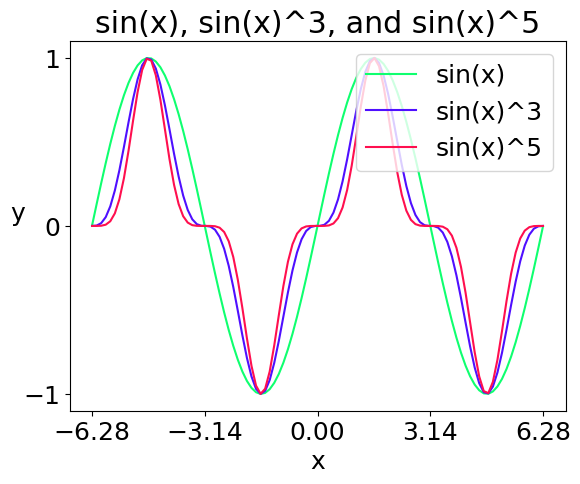

In [17]:
x = np.linspace(-6.28, 6.28, 100)
y1 = np.sin(x)
y2 = np.sin(x) ** 3
y3 = np.sin(x) ** 5

plt.plot(x, y1, color="#0FFF6F", label="sin(x)")
plt.plot(x, y2, color="#4F0FFF", label="sin(x)^3")
plt.plot(x, y3, color="#FF0F4F", label="sin(x)^5")

plt.title("sin(x), sin(x)^3, and sin(x)^5")
plt.xlabel('x')
plt.ylabel('y', rotation=0)
plt.xticks([-6.28, -3.14, 0, 3.14, 6.28])
plt.yticks([-1, 0, 1])
plt.legend(loc = "best")

plt.show()


### 4b. Anscombe's Quartet: Create a 2x2 grid of plots 

In the cell below, create a SINGLE figure with four *scatter plots* in it (2 rows, 2 columns). This should leverage matplotlib's `subplots` function and create ONE cell output (not 4).

1. You are plotting the data in `anscombe.csv`: The first set of points should be plotted on the top-left (row indices 0-10), the second set should be on the top-right (row indices 11-21), the third set should be on the bottom-left (row indices 22-32), and the last set on the bottom-right (row indices 33-43).
2. Make the markers in each subplot a different shape for fun.
3. You should not have connected curves in these plots.
4. The x/y plot limits should the same in all plots (and include all data samples).
5. You should label your axes.

Reading data from file: data/anscombe.csv
Data extracted from file. 
Now processing data...

Data processing complete!

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
[22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]
[33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43]


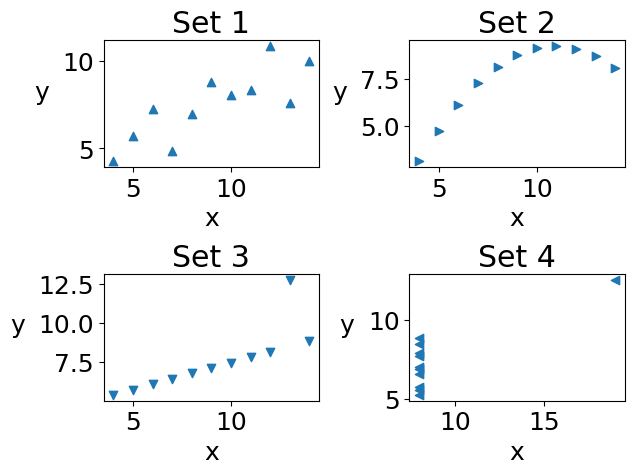

In [18]:
set_data = Data('data/anscombe.csv')
fig, axes = plt.subplots(2, 2)

for i, ax in enumerate(axes.flatten()):
    rows = range(i*11, (i+1)*11)
    print(list(rows))
    x = set_data.select_data([set_data.get_headers()[1]],rows)
    y = set_data.select_data([set_data.get_headers()[2]],rows)
    ax.scatter(x, y, marker=["^", ">", "v", "<"][i])
    ax.set_title(f'Set {i+1}')
    ax.set_xlabel('x')
    ax.set_ylabel('y', rotation=0, labelpad=15)

plt.tight_layout(pad=.5)
plt.show()

#### 4b.ii. Anscombe's Quartet: Filtered by category 



Reading data from file: data/anscombe.csv
Data extracted from file. 
Now processing data...

Data processing complete!


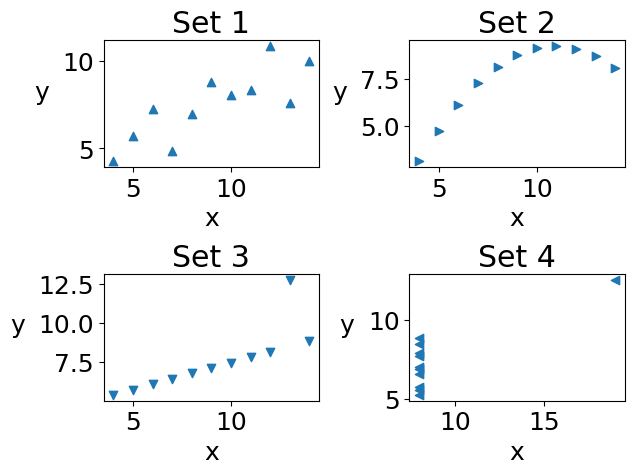

In [19]:
set_data = Data('data/anscombe.csv')
set_data_data = set_data.get_all_data()
fig, axes = plt.subplots(2, 2)

for i, ax in enumerate(axes.flatten()):
    rows = set_data_data[:,0]==i
    x = set_data.select_data([set_data.get_headers()[1]],rows)
    y = set_data.select_data([set_data.get_headers()[2]],rows)
    ax.scatter(x, y, marker=["^", ">", "v", "<"][i])
    ax.set_title(f'Set {i+1}')
    ax.set_xlabel('x')
    ax.set_ylabel('y', rotation=0, labelpad=15)

plt.tight_layout(pad=.5)
plt.show()

### 4c. `scatter` method in `Analysis`

Scatter plots will come up a lot in this course. Fill in the `scatter` method in the `Analysis` class to automate the process of selecting (x, y) data from a dataset, creating a scatter plot, labeling axes, and labeling the plot with a title.

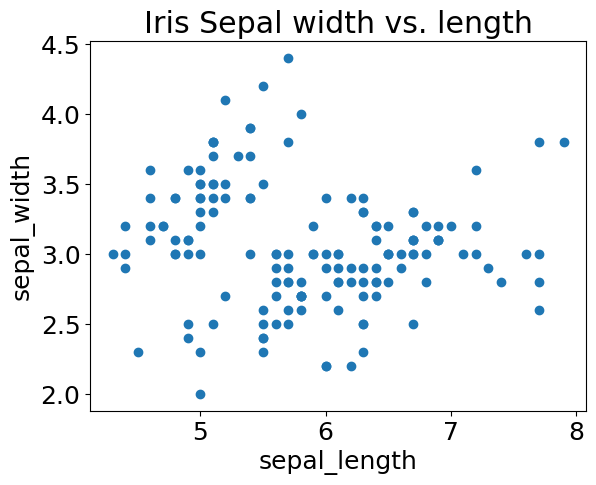

Your x sample shape is (150, 1) and should be (150,) or (150, 1)
Your y sample shape is (150, 1) and should be (150,) or (150, 1)


In [20]:
x_samps, y_samps = an.scatter('sepal_length', 'sepal_width', 'Iris Sepal width vs. length')
an.show()

print(f'Your x sample shape is {x_samps.shape} and should be (150,) or (150, 1)')
print(f'Your y sample shape is {y_samps.shape} and should be (150,) or (150, 1)')

### 4d. `pair_plot` method in `Analysis`

When doing exploratory data analysis, it is often helpful to create scatter plots of all pairs of variables to visually discover relationships and develop hypotheses to explore quantitatively. For example, if we have variables A, B, C, we would create scatter plots (x=A, y=B), (x=A, y=C), (x=B, y=C). A grid of subplots showing all these scatter plots is called a **pair plot**. If there are $M$ variables, then the grid of plots is $M\times M$.

- In `Analysis`, implement `pair_plot` and test your implementation below on the Iris data.
    - The y axis of the FIRST column should be labeled with the appropriate variable being plotted there.
    - The x axis of the LAST row should be labeled with the appropriate variable being plotted there.
    - Only label the axes and ticks on the FIRST column and LAST row. There should be no labels on other plots (it looks too cluttered otherwise!).
    - Do have tick MARKS on all plots (just not the labels).

Your plot on the bottom-left should look like:

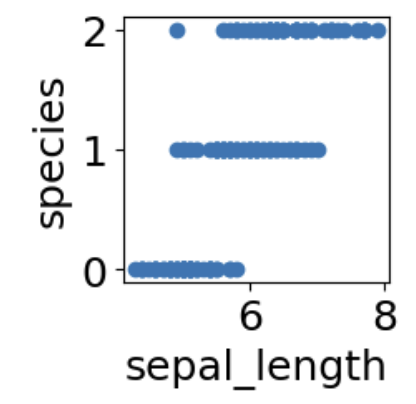

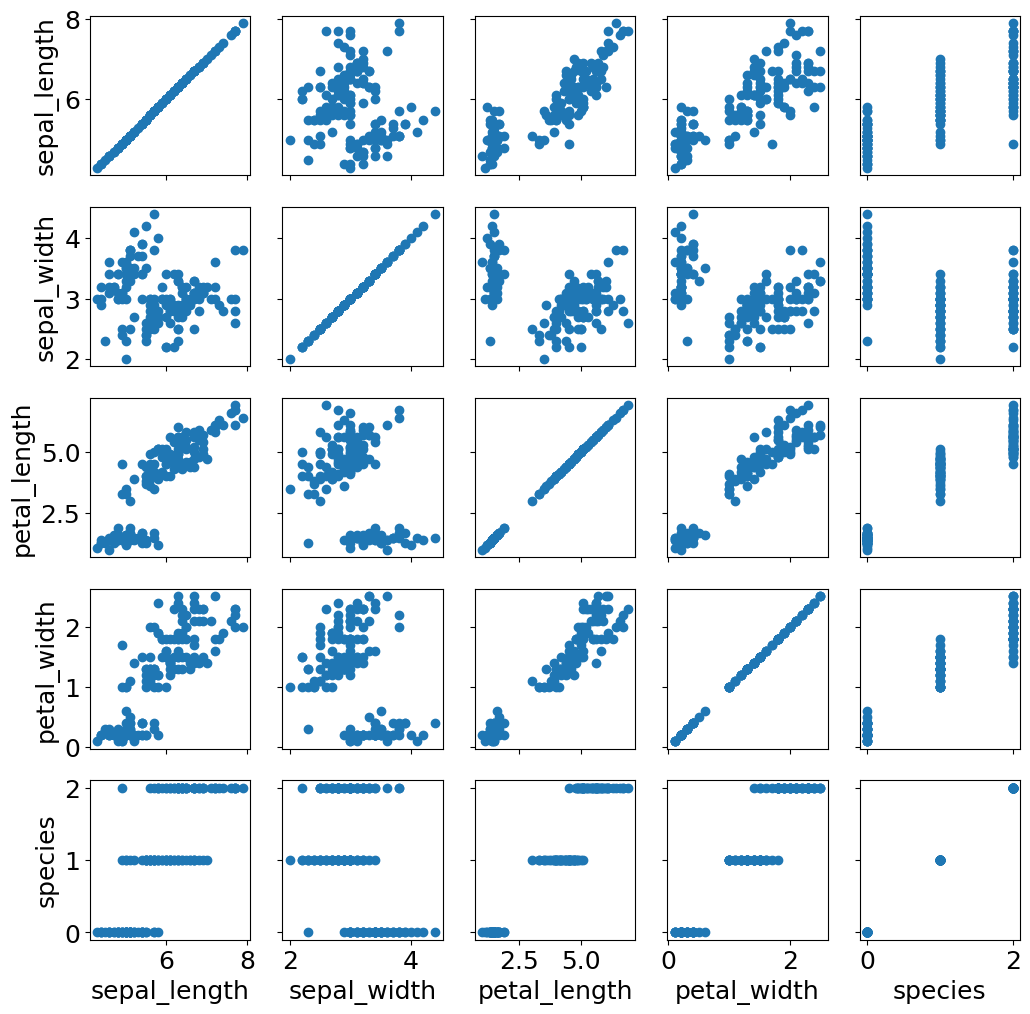

Do you have a 5x5 grid of plots? True


In [21]:
figure, axes = an.pair_plot(iris_data.headers)
plt.show()

print(f'Do you have a 5x5 grid of plots? {axes.shape[0] == 5 and axes.shape[1] == 5}')

## Task 5: Real-world application

Analyze one real-world dataset of your choice: [e.g. wine quality dataset, Old Faithful geyser dataset, Auto MPG dataset, tips dataset]. Use your **existing** visualization and analysis tools to try to learn something about the real world from this dataset (*you can implement other analyses and explore other visualizations as extensions; see below*). 

- Use scatter plot, pair plot, or other visualizations and determine which helps you learn the most about your dataset.
    - Create at least one "good" graph that presents the data in a helpful way and at least one “bad” graph that is not helpful for gleaning insight into your dataset.
- Briefly (but completely) explain your findings in the Markdown cell below alongside well-labeled graphs that support your conclusions. Explain each variable (its units, its range, mean, stdev, what it means about the world).

### A couple of quick notes on this analysis:

  - The data set I used is data that I generated. It is a set of 3D vertex coordinates and the faces that they form. It was generated by code not far from that in the blendExtract.py file. I had originally used exactly the code in that file, but that wasn't sufficient, so I did a complete rewrite from scratch. The faces are stored as a list of lists of lists of floats. The outermost list is the list of faces, the next list is the list of vertices in each face, and the last list is list of x, y, and z coordinates of each vertex. All this data is effectively stored as a 
   nested csv with 4 delimiters.
  - The data comes from an obj file for a chibi version of an anime character called 02. https://www.cgtrader.com/3d-models/character/other/zero-two-chibi-figure-3d-model
  - The data sets are massive and there are many different data arrays defined here. As such the memory usage is astronomical. This will likely not function on a PC with less than 128GB of RAM. I have 128GB of RAM, and it was using 99% of it for sizable sections. I would regularly have to restart the kernel due to failures to allocate the minimum of 32GB of RAM necessary to calculate some of the l-centralities. On a similar note, the final code set responsible for generating the centrality data takes a long time, upwards of an hour and a half even on my system (Powerful Workstation). As such if you are running this on a less powerful system, I would recommend running it with a considerably smaller sample size.

### Basic Data Load for Analysis

The first step is to load the data and do some basic analysis. This will include some basic statistics and some basic visualizations. 

Reading data from file: data/moreData.csv
Invalid data type: string
Ignoring Column.
Data extracted from file. 
Now processing data...
Data processing complete!


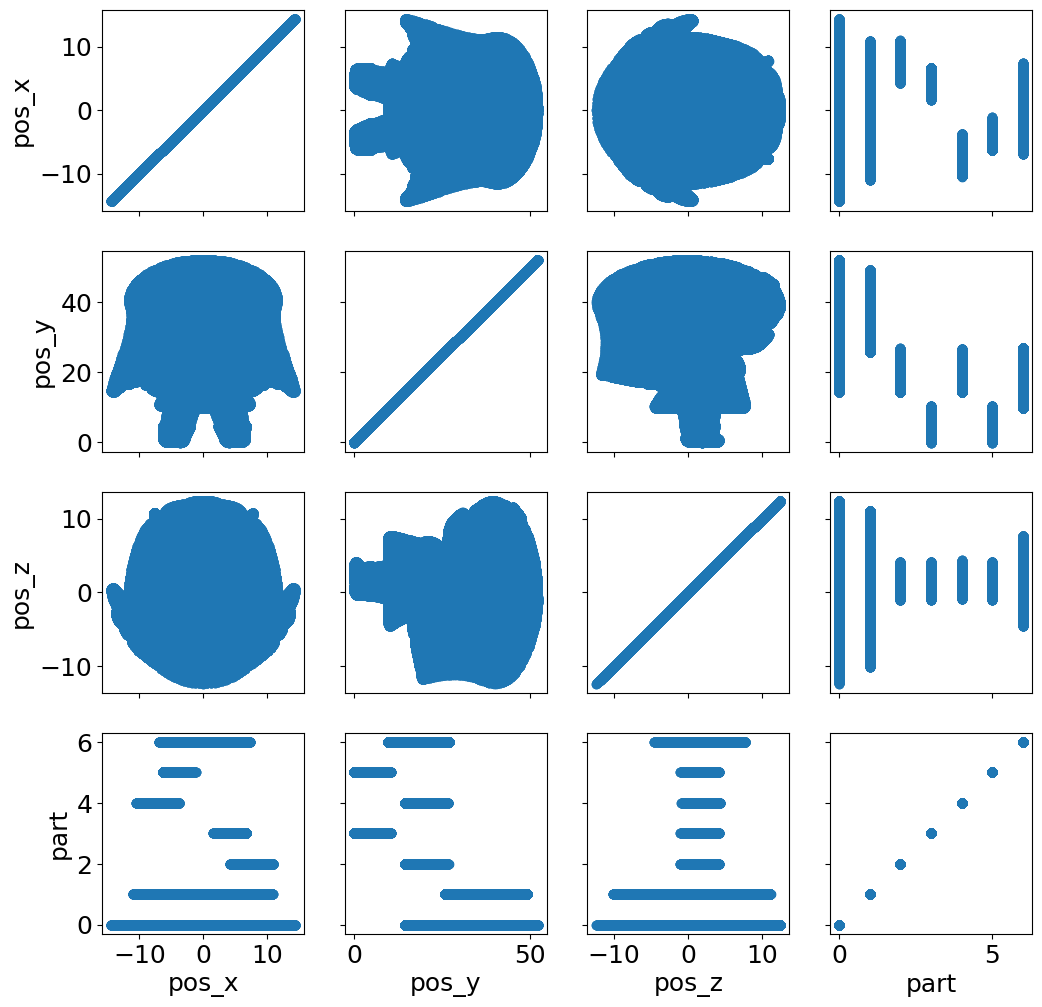

In [22]:
# Set the data for analysis
vert_filename = 'data/moreData.csv'
# vert_data = Data(vert_filename, allDataTypes=True)
vert_data = Data(vert_filename)
analysis = Analysis(vert_data)
lengths = [np.sum([vert_data.data[:, vert_data.header2col["part"]] == vert_data.cats2levels["part"].index(level)]) for level in vert_data.cats2levels["part"]]
fig, ax = analysis.pair_plot(vert_data.headers)
plt.show()

### Basic Data Analysis

As we can see from the pair plot, the data is pretty complex. However, it is also quite clear that pretty much the only insignificant charts are those located on the diagonal. 

Every other pairing of variables has a clear relationship. For instance each of the position variables has a clear relationship with the part variable. In fact the part variable is essentially a really good binning for the points.
Each plot of the part variable with the position variables essentially plots the range over each x-variable for a given part. This is a good way to visualize the data. In fact from this we can gather that:
  - arm and leg parts are such that the left and right sides have the same data range in y and z but are mirrored in x.
  - hair has the largest range over all three variables.
  - the models center of volume is skewed to positive values of z, centered in x, and indeterminate in y.

On the other hand, each of the plots of one position variable relative another effectively gives us a projection of the model on that axis. This is also a good way to visualize the data. 
  - The x-z plot gives us a top down view of the model.
  - The y-z plot gives us a side view of the model.
  - The x-y plot gives us a front view of the model.

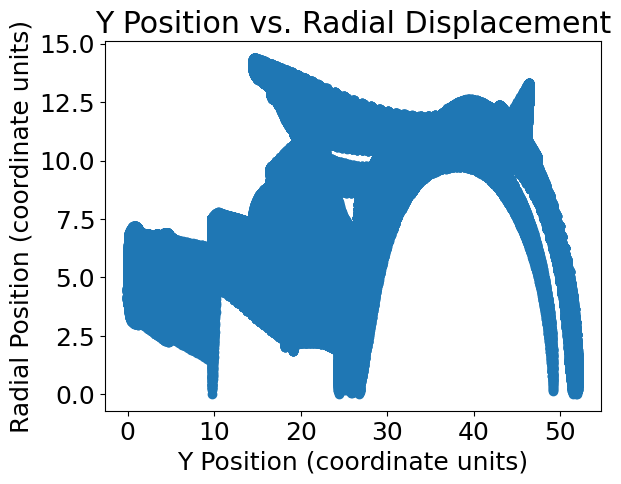

In [23]:
fig2 = plt.scatter(vert_data.select_data(["pos_y"]), [Analysis.l2_norm(np.array([0, 0]), row) for row in vert_data.select_data(["pos_x","pos_z"])])
plt.title("Y Position vs. Radial Displacement")
plt.xlabel("Y Position (coordinate units)")
plt.ylabel("Radial Position (coordinate units)")
plt.show()

### Basic Data Analysis

This plot is a less useful plot. It is less helpful because it is not super clear what the data is showing. If it were a histogram and paired with a binning function and only a maximum or average radial displacement it would be considerably helpful. 

As it stands, the data overlaps itself, is unclear, and cluttered. It is not a helpful plot.

In [24]:
y_range = analysis.range(["pos_y"])
slice_count = 21
slices = np.linspace(y_range[1][0], y_range[0][0]*(.95 if y_range[1]>0 else 1.05), slice_count)
data = np.array([Analysis.l2_norm(np.array([0, 0]), row) for row in vert_data.select_data(["pos_x","pos_z"])])
ranges = [[slices[i+1], slices[i]] for i in range(slice_count-1)]
indexes = [np.logical_and(vert_data.data[:, vert_data.header2col["pos_y"]] > range_y[0], vert_data.data[:, vert_data.header2col["pos_y"]] <= range_y[1]) for range_y in ranges]
maxes = [np.max(data[index]) for index, range_y in zip(indexes, ranges)]
means = [np.mean(data[index]) for index, range_y in zip(indexes, ranges)]

In [25]:
names = [f"{range_y[1]:.2f}-{range_y[0]:.2f}" for range_y in ranges]
names.reverse()
maxes.reverse()
means.reverse()

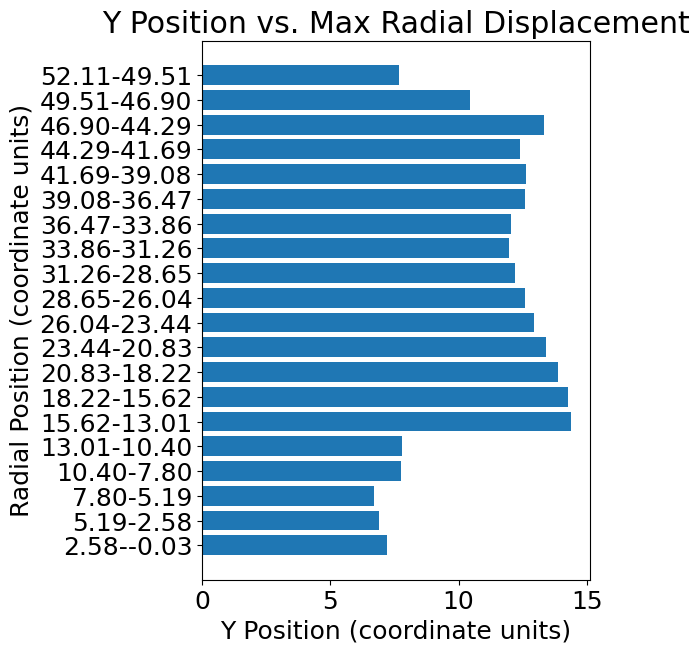

In [26]:
plt.figure(figsize=(5,7))
fig3 = plt.barh(names, maxes)
plt.title("Y Position vs. Max Radial Displacement")
plt.xlabel("Y Position (coordinate units)")
plt.ylabel("Radial Position (coordinate units)")
plt.autoscale()
plt.show()

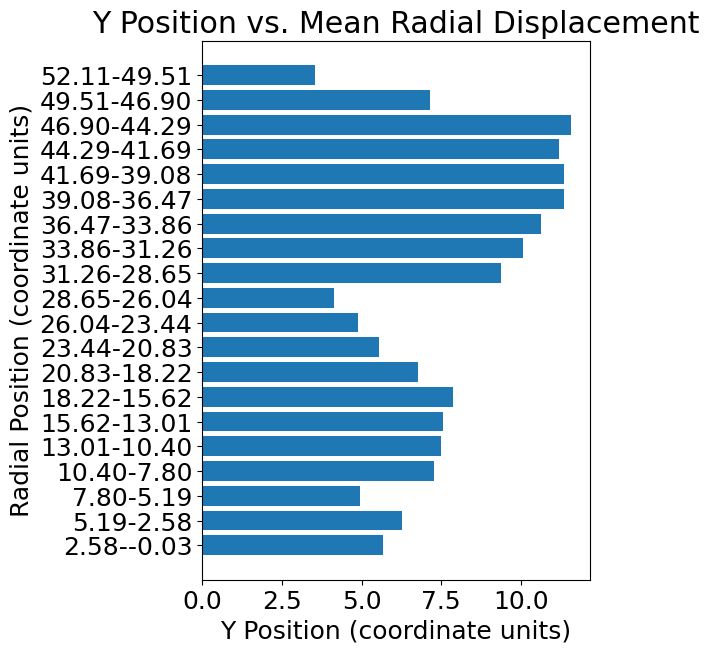

In [27]:
plt.figure(figsize=(5,7))
fig4 = plt.barh(names, means)
plt.title("Y Position vs. Mean Radial Displacement")
plt.xlabel("Y Position (coordinate units)")
plt.ylabel("Radial Position (coordinate units)")
plt.autoscale()
plt.show()

### Basic Data Analysis

As opposed to the previous scatter plot, these two bar plots are considerably more helpful. They are helpful because they are clear, concise, and informative. They show the maximum and mean radial displacement of the model over the y-axis.

### Advanced Data Analysis

Data Load:

In [ ]:
# Alt data
vert_alt_data = Data(vert_filename, allDataTypes=True)
sample_count = vert_alt_data.data.shape[0]
index_col = np.arange(sample_count)
amp_data = np.append(index_col.reshape(sample_count, 1), vert_alt_data.get_all_data(), axis=1)
indexed_positions = Data(data=amp_data[:, 0:4].astype(dtype=float), headers=(["index"] + vert_alt_data.headers[0:4]), header2col={
    "index": 0, vert_alt_data.headers[0]: 1, vert_alt_data.headers[1]: 2, vert_alt_data.headers[2]: 3, vert_alt_data.headers[3]: 4
}, )
indexed_faces = Data(data=amp_data[:, [0,5]], headers=(["index"] + [vert_alt_data.headers[4]]), header2col={"index": 0, vert_alt_data.headers[4]: 1})

Reading data from file: data/moreData.csv
Data extracted from file. 
Now processing data...
Data processing complete!


### Advanced Data Analysis

Here we create a dictionary relating each vertex to the list of faces it is a member of. Each of these faces is a list of lists of lists of floats. The outermost list is the list of faces, the next list is the list of vertices in each face, and the last list is list of x, y, and z coordinates of each vertex. 

In [ ]:
face_dict = {int(vert): [[[float(pos.strip("[( ')]")) for pos in point_string.split("|")] for point_string in face_string.split("~")] for face_string in face_set_string.split(";")] for vert, face_set_string in zip(*(indexed_faces.get_all_data().T.tolist()))}

for key in face_dict.keys():
    removal = []
    for i, face in enumerate(face_dict[key]):
        if len(face) != 4:
            removal.append(i)
    face_dict[key] = [face_dict[key][i] for i in range(len(face_dict[key])) if i not in removal]


In [ ]:
for i in range(10):
    print(f"Vertex {i} Included Faces: {face_dict[i]}")

### Advanced Data Analysis

Here we create a dictionary relating each set of vertex coordinates to the index of the vertex. This is useful for conciseness of the code and because there is a bijection between the two sets. Thus we can use the vertex coordinates as keys in the dictionary and the vertex index as the value and vice-versa.

In [ ]:
vertex_dict = {str(vert_coord): int(vert) for vert, vert_coord in zip(np.squeeze(indexed_positions.select_data(["index"])).tolist(), indexed_positions.select_data(["pos_x", "pos_y", "pos_z"]).tolist())}

In [ ]:
for i in list(vertex_dict.keys())[:10]:
    print(f"Vertex {i} index: {vertex_dict[i]}")

### Advanced Data Analysis

Here we again create a dictionary relating each vertex to the list of faces it is a member of. However, we now write our faces as sequences of vertex indices not as sequences of lists of vertex coordinates. Useful for conciseness and clarity.

In [ ]:
face_dict_index = {vert: [[vertex_dict[str(vert_coord)] for vert_coord in vert_set] for vert_set in face_set] for vert, face_set in face_dict.items()}

In [ ]:
for i in range(10):
    print(f"Vertex {i} Included Faces: {face_dict_index[i]}")

### Advanced Data Analysis

Here we determine all the unique faces in the data set. We then assign an index to each unique face. This is useful for conciseness and clarity. As well as for the next step.

Aside from indexing the faces, we also create a reverse dictionary. This is useful as it allows us to look up the index of a face by its component vertices.

In [ ]:
listo = []
ref_list = list(face_dict_index.values())
for i in ref_list:
    for j in i:
        listo.append(sorted(j))
remove = []
for i, j in enumerate(listo):
    if len(j) != 4:
        remove.append(i)
listo = [listo[i] for i in range(len(listo)) if i not in remove]
all_faces = np.array(listo, dtype=int)
unique_faces = np.unique(all_faces, axis=0)
face_lib = {f"face{i}": unique_faces[i].tolist() for i in range(len(unique_faces))}
cat_count = len(vert_data.cats2levels["part"])
faces_per_category = [{} for i in range(cat_count)]
for face in face_lib.keys():
    parts = []
    for vert in face_lib[face]:
        parts.append(vert_data.data[vert, vert_data.header2col["part"]])
    faces_per_category[int(np.rint(np.mean(parts)))][face] = 1
num_faces_per_category = [len(faces) for faces in faces_per_category]
reverse_face_lib = {str(unique_faces[i].tolist()): str(f"face{i}") for i in range(len(unique_faces))}

In [ ]:
for i in list(face_lib.keys())[:10]:
    print(f"Face {i} vertices: {face_lib[i]}")
for i in list(reverse_face_lib.keys())[:10]:
    print(f"Vertices {i} Face: {reverse_face_lib[i]}")

### Advanced Data Analysis

Here we calculate the area of each face. We do this using a generalization of Gauss's shoelace formula. 

Specifically we calculate this by taking the exterior product of each pair of vectors coinciding with adjacent vertices of the face. We then sum these exterior products, take the bi-vector norm induced by the l2 vector norm and divide by 2. This is the area of the face.

The exterior product is a formulation from exterior algebra. In R**3 it is a dual notion to the cross product. The exterior product of two vectors is a bi-vector. Luckily, this value is such that the exterior product of a and b is equal to the difference between the tensor-product of a and b and the tensor-product of b and a, ExtP(a,b) = TensP(a,b) - TensP(b,a). 

The bi-vector norm induced by the l-2 vector norm is the square root of the one half sum of the squares of each element of the bi-vector.

All this is written using einsums for maximal speed.

I chose this implementation because it was almost three times as fast as using the cross product. I have no clue why, but it is.

Lastly, we store the area of each face in a dictionary indexed by the face index.

In [ ]:
def shoelace_area(coords):
    """
    These are both implementations of the shoelace formula.
    The first is a standard vector cross product implementation. 
    Whereas, the second is a much faster implementation using numpy's einsum function and my formulation of the exterior product.
    I have no clue why my exterior product implementation is so much faster, but it is, like almost 3 times faster.
    """
    '''
    coords = np.array(coords)
    pre = np.sum([np.cross(coords[k], coords[k+1]) for k in range(-1, len(coords)-1)], axis=0)
    return 0.5 * np.sqrt(np.einsum("i,i->", pre, pre))
    '''
    coords = np.array(coords)    
    exterior_products = np.array([(np.einsum('i,j->ij', coords[k], coords[k+1]) - np.einsum('i,j->ij', coords[k+1], coords[k],)) for k in range(-1, len(coords)-1)])
    sum_of = np.einsum("ijk->jk", exterior_products)
    norm = np.sqrt(0.5 * np.einsum("ij,ij->", sum_of, sum_of))
    area =  0.5 * norm
    return area
    
face_areas = {face: shoelace_area(np.array([indexed_positions.data[vert,1:] for vert in face_lib[face]])) for face in face_lib.keys()}

In [ ]:
for i in list(face_areas.keys())[:10]:
    print(f"Face {i} area: {face_areas[i]}")

### Advanced Data Analysis

Here we calculate the average "area" of each vertex. We do this by taking the mean of the areas of the faces that the vertex is a member of. This gives us a good measure of the local density of the model at each vertex.
If we assume that our model is such that the density of the model is directly proportional to mean curvature of the surface (it isn't for some reason) then we would naturally have a good measure of the mean curvature of the model at each vertex, a notion quite analogous to the mean curvature of a surface in differential geometry and calculus.

In [ ]:
average_vertex_areas = np.array([[vert, vert_data.data[vert, vert_data.header2col["part"]], np.mean(np.array([face_areas[reverse_face_lib[str(sorted(face))]] for face in face_dict_index[vert]]))] for vert in range(1043841)])

Here we calculate the average and standard deviation of these "vertex areas" over each vertex in each part. Giving us some notion of the polygon density for each part of the model.

In [ ]:
average_vertex_areas_mean_by_category = np.array([np.mean(average_vertex_areas[average_vertex_areas[:,1].astype(int) == vert_data.cats2level_dicts["part"][i] ,2], axis=0) for i in vert_data.cats2levels["part"]])
average_vertex_areas_stdev_by_category = np.array([np.std(average_vertex_areas[average_vertex_areas[:,1].astype(int) == vert_data.cats2level_dicts["part"][i] ,2], axis=0) for i in vert_data.cats2levels["part"]])

In [ ]:
print("Average Vertex Area Data:")
print(average_vertex_areas)
print(average_vertex_areas_mean_by_category)
print(average_vertex_areas_stdev_by_category)

### Advanced Data Analysis

We finally produce a chart relating all of these values.

In [ ]:
plt.barh(vert_data.cats2levels["part"], average_vertex_areas_mean_by_category, xerr=average_vertex_areas_stdev_by_category, capsize=5)
plt.title("Average Vertex Area by Part")
plt.xlabel("Area (coordinate units squared, l2-norm)")
plt.xscale("log")
plt.show()

In [ ]:
print(num_faces_per_category)
print(np.sum(num_faces_per_category))
print(len(unique_faces))
print(lengths)
print(sample_count)
print(np.sum(lengths))
plt.figure(figsize=(9,5))
plt.barh(vert_data.cats2levels["part"], 1/np.einsum("i,i,i->i",np.array(average_vertex_areas_mean_by_category,dtype=float),np.array(lengths,dtype=float),1/np.array(num_faces_per_category,dtype=float)), xerr=1/average_vertex_areas_stdev_by_category, capsize=5)
plt.title("Average Polygon Density by Part")
plt.xlabel("Polygon Density (facets per coordinate unit squared)")
plt.xscale("log")
plt.autoscale()
plt.show()

### Advanced Data Analysis

In this chart we used a logarithmic scale for the x-axis. This is because the data is so varied that it is difficult to see the differences between the parts on a normal scale. 

Using a logarithmic scale we can note that "dual," "related," or "paired" parts have nearly identical values for both the averages and standard deviations across both graphs. This might indicate that the parts are nearly identical in terms of their polygon density. This could also mean that they might be merely mirrored or rotated versions of each other. 

Similarly, we note that the head and hair parts have the lowest average polygon density. This indicates that the head and the hair are likely the flattest parts of the model. As more polygons are necessary to represent a curved surface than a flat one.

### Advanced Data Analysis

Centrality Tests:

Here we compute l infinity centrality using the l-2 norm as the metric. L infinity centrality is a measure of the maximum distance from a vertex to any other vertex in the graph. It is effectively a measure of how "central" a vertex is in the point cloud. Points with high l infinity centrality are effectively the "corners" or "outskirts" of the set. By measuring the average and standard deviation of the l infinity centrality of each vertex in each part of the model we can get a good measure of the "spread" of the model in each part. This is useful for understanding the "shape" of the model in each part. Given all our points exist on the surface of a 3d model the average of the l infinity centrality could to some extent represent the mean diameter of our model in each part, a deformed sphere.

We do this for each part of the model. We do this by taking a random sample of 1000 vertices from each part and computing the l infinity centrality of each vertex in the sample. We do this 200 times and append all the centralities to one dataset. We then take the mean and standard deviation of these values. 

This was an hour and a half runtime on my PC. Which has super high specs. If I were you, I'd try to run it with a smaller sample size.

In [ ]:
ref_array = np.arange(vert_data.data.shape[0])
output_array = np.ndarray((0,len(vert_data.cats2levels["part"])))
for trial in range(200):
    centrality_by_part = np.array([analysis.l_centrality(["pos_x", "pos_y", "pos_z"], rows=(ref_array[vert_data.data[:, vert_data.header2col["part"]] == i])[np.random.randint(0, lengths[i], 1000)], metric=Analysis.l2_norm).tolist() for i in range(len(vert_data.cats2levels["part"]))]) 
    output_array = np.append(output_array, centrality_by_part.T, axis=0)


In [ ]:
print("Centrality Data:")
print(output_array.shape)
print(np.mean(output_array, axis=0))
print(np.std(output_array, axis=0))

In [ ]:
plt.barh(vert_data.cats2levels["part"], np.mean(output_array, axis=0), xerr=np.std(output_array, axis=0), capsize=5)
plt.title("Centrality by Part")
plt.xlabel("Centrality (coordinate units, l2-norm)")
plt.show()

**Explain your findings here:**

As expected all of our data was quite  however, within an order of magnitude of each other. This is because the model while quite varied is still such that every part is of relatively similar scale. l infinity centrality and our model is such that the parts which enclose the greatest volume have the highest l-infinity centrality. 

Note again that parts which have a natural "dual" or "related" part have nearly identical values for both the averages and standard deviations.

As for standard deviations, the deviation was lowest in the head part. This indicates that the head is the most "uniform" part of the model. This is likely because the head is the most "spherical" part of the model. Which naturally makes sense given it's a head.

A sample with minimal standard deviation in l infinity centrality would just be a sphere in the l2-norm as l2-norm induces radial symmetry in distance.

## Extensions

### a. AI Policy

The goal of extensions is to learn and create something new beyond the base project that excites you. To serve this goal and out of fairness to your hardworking classmates, **AI (e.g. ChatGPT, Copilot, etc.) should NOT be used in ANY way on this project and extensions.** This includes both written analysis, plotting, and code. We will only grade **your** work, not the AI's. **We will stop grading your project if we notice AI-generated content (to any capacity).**

### b. Guidelines

To receive credit for any extension, you must:
1. Not modify / prevent any code from the core project from working (e.g. make a copy before changing). In other words, **the notebook test code should still work!**
2. **You must describe what you did and what you found in detail**. This includes a summary of parameter values used in your simulations.
3. Include (*labeled!*) plots and/or numbers to present your results.
4. Write up your extensions below or in a separate notebook.
5. Give kudos to all sources, including anyone that you consulted.

### c. Suggestions

**Rule of thumb: one deep, thorough extension is worth more than several quick, shallow extensions!**

The ideas below are **suggested** extensions — feel free to go in another direction related to this project that is not listed!

### 1. More visualizations

Research and create more visualizations of data. If we haven't talked about it in class, all the better! This could be in the matplotlib API or something you build yourself (probably a better extension).

### 2. More summary statistics

Research, implement, and apply additional ways to quantitatively summarize a dataset. Compare these other techniques with those that you implemented in this project.

### 3. More datasets

Analyze and visualize additional datasets. Document and report on insights/hypothesized relationships that you may have discovered.

### 4. Anscombe's Quartet

Despite the visual dissimilarity of the data samples in each group of points, the groups of data have many identical (or nearly identical) summary statistics! Use you analysis code to verify this. Explain what it means / why it happens. Research additional statistics that are identical in the quartet, then implement and verify their similarity.  

### 5. Filtering dataset by categorical variable.

It is also possible to generate the Anscombe's Quartet plot by taking advantage of the `dataset` categorical variable: only plot samples in a particular subplot panel that have a `dataset` value of either `I`, `II`, `III` or `IV`). In other words, only plot a filtered version of the dataset based on the categorical data value.

As an extension, you can also run analyses after filter other datasets based on categorical data values (e.g. compute the mean of numeric variables that have the same value of a categorical variable).

### 6. Additional data types

You wrote `Data` to only store numeric and categorical data types. Extend your `Data` class to correctly parse and represent dates, strings, and other types of data.

NOTE: You will definitely want to make a copy of your `Data` class before attempting this!

### 7. Joint plot

Use matplotlib to create a [jointplot](https://seaborn.pydata.org/_images/jointplot_1_0.png): a scatter plot of numeric data that has histograms on the top and right side showing the number of samples that fall within different intervals ("bins"). The top histogram shows the distribution of the "x" variable and the right histogram shows the distribution of the "y" variable. Once you implement a joint plot, show how it can be useful (vs. just a scatter plot) to glean insight about a dataset of your choice.